# Run these cells to see the issue

### Load prepared graphs

In [1]:
import numpy as np
import networkx as nx


Graphs = np.load("graphs.npy", allow_pickle=True)

num_nodes = [g.number_of_nodes() for g in Graphs]
num_nodes

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [2]:
from Qommunity.samplers.hierarchical.gurobi_sampler import GurobiSampler
from Qommunity.searchers.hierarchical_community_searcher import HierarchicalCommunitySearcher

### Prepare dirs

In [3]:
import os


dir = "gurobi_test_results/one_instance"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)


def make_dir(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

# 1. Run Gurobi N times - the same instance case

In [4]:
solver = "gurobi"
make_dir(f"{dir}/{solver}")

In [5]:
# to recall what num_nodes was
# num_nodes = [g.number_of_nodes() for g in Graphs]
num_nodes = np.linspace(10, 100, 10)
num_nodes

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [6]:
from tqdm import tqdm


N_RUNS = 10


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):
    # supress_output=True won't work because that was only modified
    # in my local QHyper, in remote QHyper to be done
    gurobi = GurobiSampler(G, supress_output=True)
    hierch_searcher = HierarchicalCommunitySearcher(gurobi)
    
    for r in range(N_RUNS):
        comms_res = hierch_searcher.hierarchical_community_search()
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/mods_final", mods)
np.save(f"{dir}/{solver}/comms_final", comms)

0it [00:00, ?it/s]

Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-27
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 10 columns and 0 nonzeros
Model fingerprint: 0x29e61795
Model has 55 quadratic objective terms
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -3.2777778
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution cou

1it [00:00,  3.12it/s]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 20 columns and 0 nonzeros
Model fingerprint: 0x98575c0f
Model has 210 quadratic objective terms
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -4.2105263
Presolve removed 0 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 3: -4.21053 -1.60

2it [00:02,  1.40s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 30 columns and 0 nonzeros
Model fingerprint: 0xaadd3e22
Model has 465 quadratic objective terms
Variable types: 0 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-02, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -12.3448276
Presolve removed 0 rows and 19 columns
Presolve time: 0.00s
Presolved: 45 rows, 56 columns, 135 nonzeros
Variable types: 0 continuous, 56 integer (56 binary)

Root relaxation: objective -1.313793e+01, 21 iterations, 0.00 seconds (0.00 work units)

    N

3it [00:03,  1.01s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 40 columns and 0 nonzeros
Model fingerprint: 0x1d552d8d
Model has 820 quadratic objective terms
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -17.4871795
Presolve removed 0 rows and 27 columns
Presolve time: 0.00s
Presolved: 66 rows, 79 columns, 198 nonzeros
Variable types: 0 continuous, 79 integer (79 binary)

Root relaxation: objective -2.241026e+01, 19 iterations, 0.00 seconds (0.00 work units)

    N

4it [00:07,  2.26s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 50 columns and 0 nonzeros
Model fingerprint: 0x330d28bd
Model has 1275 quadratic objective terms
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -22.0000000
Presolve removed 0 rows and 34 columns
Presolve time: 0.00s
Presolved: 105 rows, 121 columns, 315 nonzeros
Variable types: 0 continuous, 121 integer (121 binary)

Root relaxation: objective -2.998469e+01, 30 iterations, 0.00 seconds (0.00 work units)



5it [00:08,  1.88s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 60 columns and 0 nonzeros
Model fingerprint: 0x53c7eb57
Model has 1830 quadratic objective terms
Variable types: 0 continuous, 60 integer (60 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -27.4237288
Presolve removed 0 rows and 37 columns
Presolve time: 0.00s
Presolved: 231 rows, 254 columns, 693 nonzeros
Variable types: 0 continuous, 254 integer (254 binary)

Root relaxation: objective -3.953390e+01, 38 iterations, 0.00 seconds (0.00 work units)



6it [00:09,  1.52s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 70 columns and 0 nonzeros
Model fingerprint: 0x30f8cae6
Model has 2485 quadratic objective terms
Variable types: 0 continuous, 70 integer (70 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -33.2391304
Presolve removed 0 rows and 47 columns
Presolve time: 0.00s
Presolved: 231 rows, 254 columns, 693 nonzeros
Variable types: 0 continuous, 254 integer (254 binary)

Root relaxation: objective -4.738406e+01, 46 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

7it [00:10,  1.35s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 80 columns and 0 nonzeros
Model fingerprint: 0x4d2d2045
Model has 3240 quadratic objective terms
Variable types: 0 continuous, 80 integer (80 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -37.1898734
Presolve removed 0 rows and 54 columns
Presolve time: 0.00s
Presolved: 300 rows, 326 columns, 900 nonzeros
Variable types: 0 continuous, 326 integer (326 binary)

Root relaxation: objective -5.059494e+01, 53 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

8it [00:11,  1.32s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 90 columns and 0 nonzeros
Model fingerprint: 0x7f4d17a4
Model has 4095 quadratic objective terms
Variable types: 0 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -42.9382022
Presolve removed 0 rows and 57 columns
Presolve time: 0.00s
Presolved: 496 rows, 529 columns, 1488 nonzeros
Variable types: 0 continuous, 529 integer (529 binary)

Root relaxation: objective -6.783427e+01, 93 iterations, 0.00 seconds (0.00 work units)


9it [00:13,  1.59s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 100 columns and 0 nonzeros
Model fingerprint: 0x66d30b31
Model has 5050 quadratic objective terms
Variable types: 0 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -47.4545455
Presolve removed 0 rows and 60 columns
Presolve time: 0.00s
Presolved: 741 rows, 781 columns, 2223 nonzeros
Variable types: 0 continuous, 781 integer (781 binary)

Root relaxation: objective -7.061616e+01, 108 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Ob

10it [00:17,  1.72s/it]


## Issue -> a lot of zero modularity scores

In [7]:
mods

array([[4.01234568e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.96398892e-01, 2.96398892e-01, 2.96398892e-01, 2.96398892e-01,
        2.96398892e-01, 2.96398892e-01, 2.96398892e-01, 2.96398892e-01,
        2.96398892e-01, 2.96398892e-01],
       [5.63020214e-01, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16, 1.11022302e-16, 1.11022302e-16,
        1.11022302e-16, 1.11022302e-16],
       [6.84089415e-01, 6.84089415e-01, 6.84089415e-01, 6.84089415e-01,
        6.84089415e-01, 6.84089415e-01, 6.84089415e-01, 6.84089415e-01,
        6.84089415e-01, 6.84089415e-01],
       [6.79925031e-01, 6.79925031e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.30680839e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
   

In [8]:
mods_gurobi = np.load(f"{dir}/gurobi/mods_final.npy")

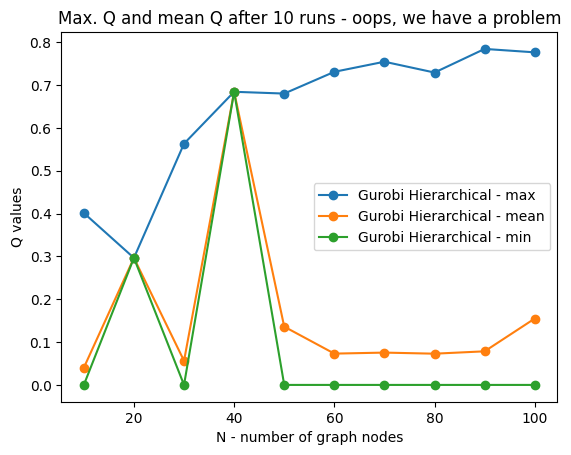

In [9]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1)
plt.plot(num_nodes, mods_gurobi.max(axis=-1), '-o', label="Gurobi Hierarchical - max")
plt.plot(num_nodes, mods_gurobi.mean(axis=-1), '-o', label="Gurobi Hierarchical - mean")
plt.plot(num_nodes, mods_gurobi.min(axis=-1), '-o', label="Gurobi Hierarchical - min")
plt.legend()
ax.set_title(f"Max. Q and mean Q after {N_RUNS} runs - oops, we have a problem");
ax.set_xlabel("N - number of graph nodes");
ax.set_ylabel("Q values");

In [10]:
np.isclose(mods_gurobi, np.zeros(mods_gurobi.shape))

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True]])

A looot of zeros.

# 2. Now run Gurobi N times on different instances - different instances case

In [11]:
import os


dir = "gurobi_test_results/multiple_instances"
os.makedirs(os.path.dirname(dir+"/"), exist_ok=True)


def make_dir(dir):
    if not os.path.exists(dir):
        os.mkdir(dir)

In [12]:
solver = "gurobi"
make_dir(f"{dir}/{solver}")

In [13]:
from tqdm import tqdm


N_RUNS = 10


mods = np.zeros((num_nodes.shape[0], N_RUNS))
comms = np.empty((num_nodes.shape[0], N_RUNS), dtype=object)

mods_graph_N = np.zeros((N_RUNS))
comms_graph_N = np.empty((N_RUNS), dtype=object)
for i, G in tqdm(enumerate(Graphs)):    
    for r in range(N_RUNS):
        # this time, new instance each time
        # Again, the surpress flag is useless now
        gurobi = GurobiSampler(G, supress_output=True)
        hierch_searcher = HierarchicalCommunitySearcher(gurobi)
        comms_res = hierch_searcher.hierarchical_community_search()
        
        mod_score = nx.community.modularity(G, comms_res)
        mods_graph_N[r] = mod_score
        comms_graph_N[r] = comms_res

    current_net_size = int(num_nodes[i])
    mods[i] = mods_graph_N
    comms[i] = comms_graph_N
    np.save(f"{dir}/{solver}/network_size_{current_net_size}", mods_graph_N)
    np.save(f"{dir}/{solver}/network_size_{current_net_size}_comms", comms_graph_N)

np.save(f"{dir}/{solver}/mods_final", mods)
np.save(f"{dir}/{solver}/comms_final", comms)

0it [00:00, ?it/s]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 10 columns and 0 nonzeros
Model fingerprint: 0x29e61795
Model has 55 quadratic objective terms
Variable types: 0 continuous, 10 integer (10 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-01, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -3.2777778
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: -3.27778 0 
No other solutions better than -3.27778

Optimal s

1it [00:01,  1.24s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 20 columns and 0 nonzeros
Model fingerprint: 0x98575c0f
Model has 210 quadratic objective terms
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-02, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -4.2105263
Presolve removed 0 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 3: -4.21053 -1.60

2it [00:03,  1.84s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 30 columns and 0 nonzeros
Model fingerprint: 0xaadd3e22
Model has 465 quadratic objective terms
Variable types: 0 continuous, 30 integer (30 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-02, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -12.3448276
Presolve removed 0 rows and 19 columns
Presolve time: 0.00s
Presolved: 45 rows, 56 columns, 135 nonzeros
Variable types: 0 continuous, 56 integer (56 binary)

Root relaxation: objective -1.313793e+01, 21 iterations, 0.00 seconds (0.00 work units)

    N

3it [00:07,  2.76s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 40 columns and 0 nonzeros
Model fingerprint: 0x1d552d8d
Model has 820 quadratic objective terms
Variable types: 0 continuous, 40 integer (40 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -17.4871795
Presolve removed 0 rows and 27 columns
Presolve time: 0.00s
Presolved: 66 rows, 79 columns, 198 nonzeros
Variable types: 0 continuous, 79 integer (79 binary)

Root relaxation: objective -2.241026e+01, 19 iterations, 0.00 seconds (0.00 work units)

    N

4it [00:11,  3.48s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 50 columns and 0 nonzeros
Model fingerprint: 0x330d28bd
Model has 1275 quadratic objective terms
Variable types: 0 continuous, 50 integer (50 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -22.0000000
Presolve removed 0 rows and 34 columns
Presolve time: 0.00s
Presolved: 105 rows, 121 columns, 315 nonzeros
Variable types: 0 continuous, 121 integer (121 binary)

Root relaxation: objective -2.998469e+01, 30 iterations, 0.00 seconds (0.00 work units)



5it [00:17,  4.36s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 60 columns and 0 nonzeros
Model fingerprint: 0x53c7eb57
Model has 1830 quadratic objective terms
Variable types: 0 continuous, 60 integer (60 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [2e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -27.4237288
Presolve removed 0 rows and 37 columns
Presolve time: 0.00s
Presolved: 231 rows, 254 columns, 693 nonzeros
Variable types: 0 continuous, 254 integer (254 binary)

Root relaxation: objective -3.953390e+01, 38 iterations, 0.00 seconds (0.00 work units)



6it [00:24,  5.26s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 70 columns and 0 nonzeros
Model fingerprint: 0x30f8cae6
Model has 2485 quadratic objective terms
Variable types: 0 continuous, 70 integer (70 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -33.2391304
Presolve removed 0 rows and 47 columns
Presolve time: 0.00s
Presolved: 231 rows, 254 columns, 693 nonzeros
Variable types: 0 continuous, 254 integer (254 binary)

Root relaxation: objective -4.738406e+01, 46 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

7it [00:35,  6.87s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 80 columns and 0 nonzeros
Model fingerprint: 0x4d2d2045
Model has 3240 quadratic objective terms
Variable types: 0 continuous, 80 integer (80 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 6e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -37.1898734
Presolve removed 0 rows and 54 columns
Presolve time: 0.00s
Presolved: 300 rows, 326 columns, 900 nonzeros
Variable types: 0 continuous, 326 integer (326 binary)

Root relaxation: objective -5.059494e+01, 53 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objecti

8it [00:45,  8.09s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 90 columns and 0 nonzeros
Model fingerprint: 0x7f4d17a4
Model has 4095 quadratic objective terms
Variable types: 0 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective -42.9382022
Presolve removed 0 rows and 57 columns
Presolve time: 0.00s
Presolved: 496 rows, 529 columns, 1488 nonzeros
Variable types: 0 continuous, 529 integer (529 binary)

Root relaxation: objective -6.783427e+01, 93 iterations, 0.00 seconds (0.00 work units)


9it [01:08, 12.54s/it]

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 0 rows, 100 columns and 0 nonzeros
Model fingerprint: 0x66d30b31
Model has 5050 quadratic objective terms
Variable types: 0 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-02, 4e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Found heuristic solution: objective -47.4545455
Presolve removed 0 rows and 60 columns
Presolve time: 0.00s
Presolved: 741 rows, 781 columns, 2223 nonzeros
Variable types: 0 continuous, 781 integer (781 binary)

Root relaxation: objective -7.061616e+01, 108 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Ob

10it [01:29,  8.96s/it]


In [14]:
mods

array([[0.40123457, 0.40123457, 0.40123457, 0.40123457, 0.40123457,
        0.40123457, 0.40123457, 0.40123457, 0.40123457, 0.40123457],
       [0.29639889, 0.29639889, 0.29639889, 0.29639889, 0.29639889,
        0.29639889, 0.29639889, 0.29639889, 0.29639889, 0.29639889],
       [0.56302021, 0.56302021, 0.56302021, 0.56302021, 0.56302021,
        0.56302021, 0.56302021, 0.56302021, 0.56302021, 0.56302021],
       [0.68408941, 0.68408941, 0.68408941, 0.68408941, 0.68408941,
        0.68408941, 0.68408941, 0.68408941, 0.68408941, 0.68408941],
       [0.67992503, 0.67992503, 0.67992503, 0.67992503, 0.67992503,
        0.67992503, 0.67992503, 0.67992503, 0.67992503, 0.67992503],
       [0.73068084, 0.73068084, 0.73068084, 0.73068084, 0.73068084,
        0.73068084, 0.73068084, 0.73068084, 0.73068084, 0.73068084],
       [0.75425331, 0.75425331, 0.75425331, 0.75425331, 0.75425331,
        0.75425331, 0.75425331, 0.75425331, 0.75425331, 0.75425331],
       [0.72896972, 0.72896972, 0.7289697

Nice

In [15]:
mods_gurobi_2 = np.load(f"{dir}/gurobi/mods_final.npy")

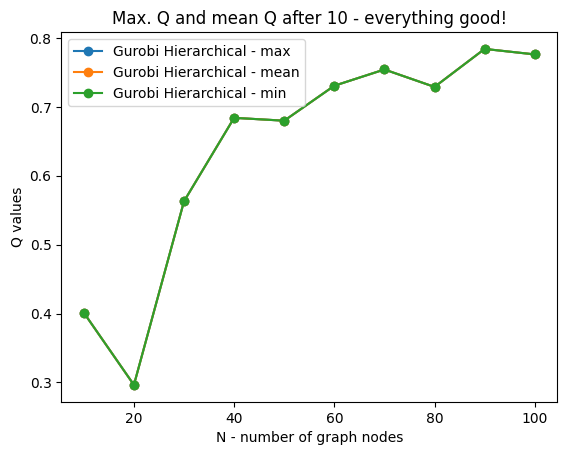

In [16]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(1)
plt.plot(num_nodes, mods_gurobi_2.max(axis=-1), '-o', label="Gurobi Hierarchical - max")
plt.plot(num_nodes, mods_gurobi_2.mean(axis=-1), '-o', label="Gurobi Hierarchical - mean")
plt.plot(num_nodes, mods_gurobi_2.min(axis=-1), '-o', label="Gurobi Hierarchical - min")
plt.legend()
ax.set_title(f"Max. Q and mean Q after {N_RUNS} - everything good!");
ax.set_xlabel("N - number of graph nodes");
ax.set_ylabel("Q values");

In [18]:
np.isclose(mods_gurobi_2, np.zeros(mods_gurobi_2.shape)).any()

False

In [19]:
mods_gurobi_2

array([[0.40123457, 0.40123457, 0.40123457, 0.40123457, 0.40123457,
        0.40123457, 0.40123457, 0.40123457, 0.40123457, 0.40123457],
       [0.29639889, 0.29639889, 0.29639889, 0.29639889, 0.29639889,
        0.29639889, 0.29639889, 0.29639889, 0.29639889, 0.29639889],
       [0.56302021, 0.56302021, 0.56302021, 0.56302021, 0.56302021,
        0.56302021, 0.56302021, 0.56302021, 0.56302021, 0.56302021],
       [0.68408941, 0.68408941, 0.68408941, 0.68408941, 0.68408941,
        0.68408941, 0.68408941, 0.68408941, 0.68408941, 0.68408941],
       [0.67992503, 0.67992503, 0.67992503, 0.67992503, 0.67992503,
        0.67992503, 0.67992503, 0.67992503, 0.67992503, 0.67992503],
       [0.73068084, 0.73068084, 0.73068084, 0.73068084, 0.73068084,
        0.73068084, 0.73068084, 0.73068084, 0.73068084, 0.73068084],
       [0.75425331, 0.75425331, 0.75425331, 0.75425331, 0.75425331,
        0.75425331, 0.75425331, 0.75425331, 0.75425331, 0.75425331],
       [0.72896972, 0.72896972, 0.7289697

### That's it.